## 0: Section Overview

In this section we will experiment with stacking our models. Stacking models can improve predictive accuracy on unseen data and reduce model bias [1]. By leveraging multiple models, stacking combines the unique insights from each model, thus capturing insights that may have been missed by individual models.

## 1: Necessary Imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## 2: Data Accsess

In [2]:
test_file_path = '~/University/bristol/year_4/DataScienceToolbox/Assessment1/Datasets/test.xlsx'
train_file_path = '~/University/bristol/year_4/DataScienceToolbox/Assessment1/Datasets/train.xlsx'
test_data = pd.read_excel(test_file_path)
train_data = pd.read_excel(train_file_path)

## 3: Implementing the stacked model

We will first define our models, along with their optimal hyperparameters.

In [3]:
indep_train = train_data[['Mean_Stringency_Index', 'CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index', 'days_since', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dep_train = train_data['reproduction_rate']
indep_test = test_data[['Mean_Stringency_Index', 'CH_Index', 'Gov_Resp_Index', 'Econ_Sup_Index', 'days_since', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dep_test = test_data['reproduction_rate']

knn_model = KNeighborsRegressor(n_neighbors=12, p=1, weights = 'uniform')
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=350, max_features=2, bootstrap=True, n_jobs=3, random_state=42)
meta_learner = LinearRegression()

stacked_model = StackingRegressor(
    estimators=[('knn', knn_model), ('linear', linear_model), ('rf', rf_model)],
    final_estimator=meta_learner
)

stacked_model.fit(indep_train, dep_train)
predictions = stacked_model.predict(indep_test)
mse = mean_squared_error(dep_test, predictions)
print(f'Mean Squared Error of Stacked Model: {mse}')

Mean Squared Error of Stacked Model: 0.1133846061877929




## 4: Visualising model success

We will now use a variety of visualisation tools in order to better analyse this stacked model. The first we will use is a Residuals Plot.


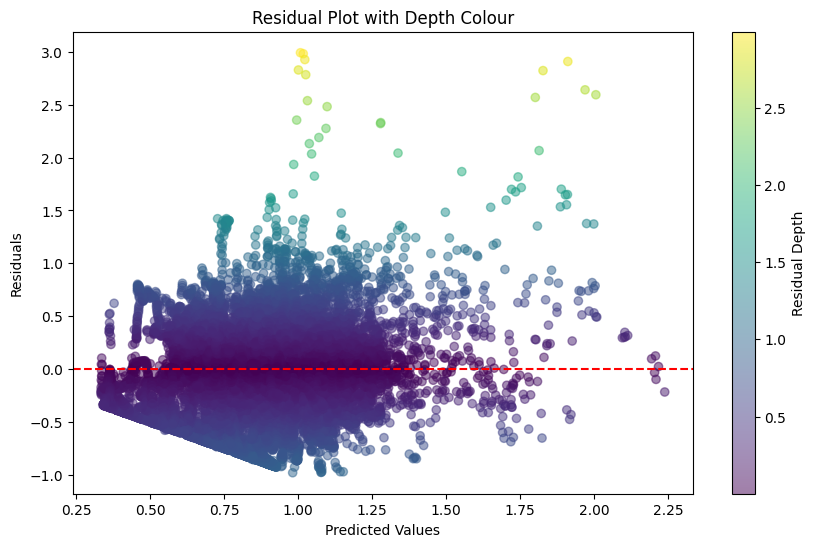

In [5]:
residuals = dep_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, c=np.abs(residuals), cmap="viridis", alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.colorbar(label="Residual Depth")
plt.title("Residual Plot with Depth Colour")
plt.show()


This scatter plot shows that although the general trend on the points follows the x-axis, the majority of points do not lie on this line. There are also a few points which are very far away, especially as the predicted values get bigger. 

We will now create a histogram of residuals in order to see the distribution of residuals. 

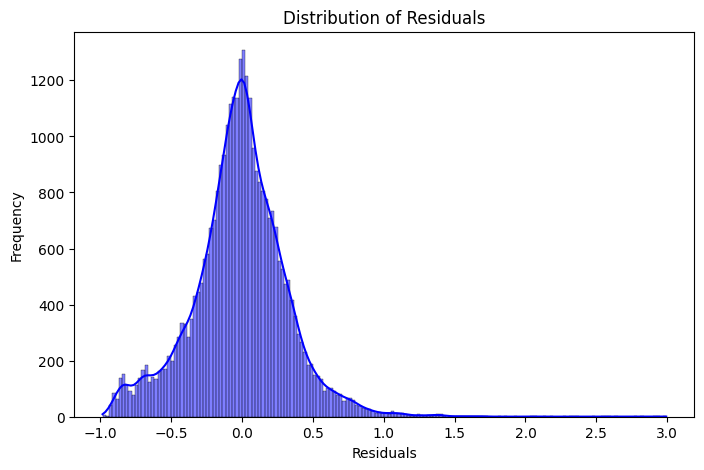

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

The histogram of residuals is approximately normal and centred around zero which shows that the majority of residuals are close to zero. The histogram appears to be slightly right-skewed, indicating that predictions are generally lower than actual values.

## References

[1] - [IBM - Stack Machine Learning Models](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/)